# Lab 3 - Prior and Posterior predictive distributions
#### Dominik Czyżyk
gr. 3 - Thursday 9:30

### Modeling prior predictive distribution

In [147]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [148]:
gen_quant = CmdStanModel(stan_file='/home/Lab3/code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [149]:
samples = gen_quant.sample( fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [150]:
df_1 = samples.draws_pd()
df_1.head()

,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,5.0,0.065532
1,0.0,0.0,50.0,8.0,0.155281
2,0.0,0.0,50.0,10.0,0.224288
3,0.0,0.0,50.0,7.0,0.176569
4,0.0,0.0,50.0,14.0,0.265493


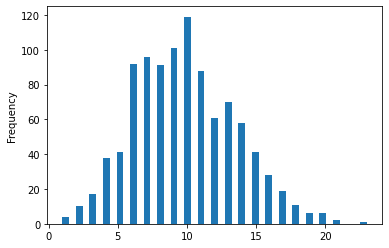

In [151]:
df_1['y'].plot.hist(bins=45)
plt.show()

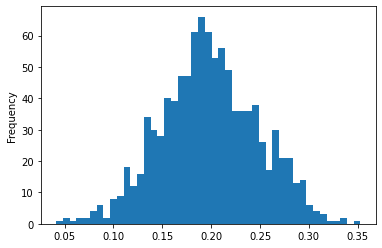

In [152]:
df_1['p'].plot.hist(bins=45)
plt.show()

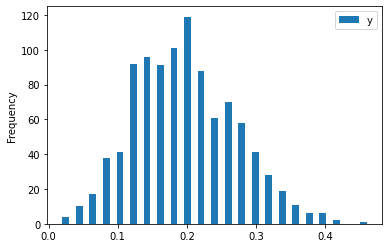

In [153]:
ratio = pd.DataFrame(df_1['y'] / 50)
ratio.plot.hist(bins=45)
plt.show()

Mean of the ratio is consistent with prior knowledge, because it approximately equals 0.2.

### Modeling posterior and posterior predictive distribution

In [154]:
gen_quant = CmdStanModel(stan_file='/home/Lab3/code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [155]:
samples = gen_quant.sample( data={'N': 50, 'y': 7})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [156]:
df_2 = samples.draws_pd()
df_2.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-22.7219,1.000000,1.02305,1.0,1.0,0.0,22.9052,0.201801,12.0
1,-29.2532,0.032204,1.02305,1.0,1.0,0.0,29.4640,0.323255,18.0
2,-24.9408,1.000000,1.02305,1.0,1.0,0.0,28.1633,0.263636,13.0
3,-22.5295,1.000000,1.02305,1.0,3.0,0.0,24.0328,0.177353,13.0
4,-22.8513,0.916077,1.02305,1.0,3.0,0.0,22.8709,0.208789,11.0


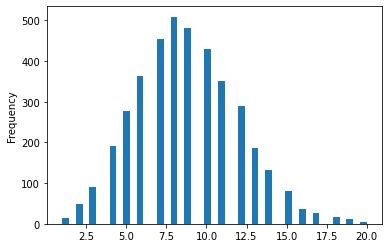

In [157]:
df_2['y_pred'].plot.hist(bins=45)
plt.show()

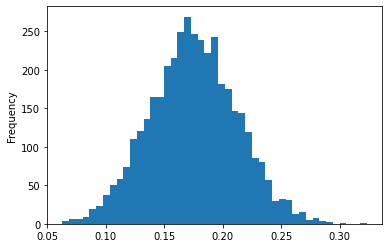

In [158]:
df_2['p'].plot.hist(bins=45)
plt.show()

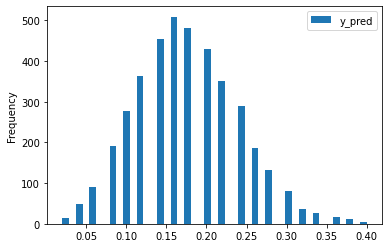

In [159]:
ratio = pd.DataFrame(df_2['y_pred'] / 50)
ratio.plot.hist(bins=45)
plt.show()

In [160]:
ratio.mean()

y_pred    0.17557
dtype: float64

/usr/local/lib/python3.9/site-packages/arviz/data/base.py:220: UserWarning: More chains (4000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


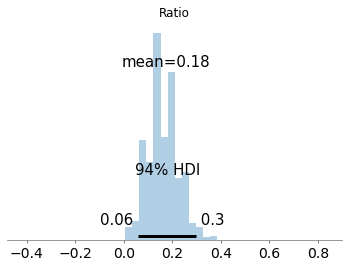

In [161]:
ratio = ratio.to_numpy()
az.plot_posterior(ratio, kind='hist', hdi_prob=0.94, point_estimate='mean')
plt.title("Ratio")
plt.show()

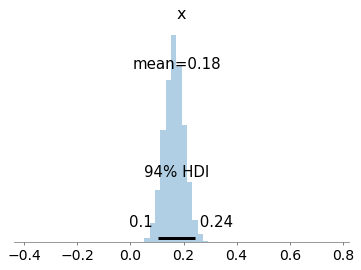

In [162]:
p = df_2['p'].to_numpy()
az.plot_posterior(p, kind='hist', hdi_prob=0.94, point_estimate='mean')
plt.show()

In [163]:
ratio_mean = np.mean(ratio)
ratio_hdi = az.hdi(ratio, hdi_prob=0.94)
p_mean = np.mean(p)
p_hdi = az.hdi(p, hdi_prob=0.94)

print("Ratio:")
print("mean: ", ratio_mean, "  94% HDI: ", ratio_hdi)
print("p:")
print("mean: ", p_mean, "  94% HDI: ", p_hdi)

Ratio:
mean:  0.17557000000000003   94% HDI:  [[0.06 0.3 ]]
p:
mean:  0.175216326025   94% HDI:  [0.103772 0.24319 ]


/tmp/ipykernel_317/1409638514.py:2: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ratio_hdi = az.hdi(ratio, hdi_prob=0.94)


In [164]:
ratio_lower_then_avg = np.mean(ratio < 0.2)
print("Probability that ratio is lower than the average probability from traditional vaccines: ", ratio_lower_then_avg)

Probability that ratio is lower than the average probability from traditional vaccines:  0.608
